# Assignment 3

## Convolutional neural network (CNN) (Any One from the following)

Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df['label'].unique()  # number of unique labels for one-hot encoding

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [6]:
X_train = train_df.iloc[:, 1:].values   # All columns from 1 - n
y_train = train_df.iloc[:, 0].values    # First column

X_test = test_df.iloc[:, 1:].values   # All columns from 1 - n
y_test = test_df.iloc[:, 0].values    # First column

In [7]:
# Normalize pixel values from [0,255] to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Reshape the 1D pixel values vector into 2D { (60000, 784) -> (60000, 28, 28)}
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
# One-hot encoding on categorical values
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [10]:
# Build a sequential CNN model
model = Sequential([

    # First convolutional layer:
    # - 32 filters
    # - 3x3 kernel size
    # - ReLU activation for non-linearity
    # - Input shape is 28x28x1 (grayscale image)
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),

    # First max pooling layer:
    # - Downsamples the feature map by taking the max over 2x2 regions
    MaxPooling2D(2,2),

    # Second convolutional layer:
    # - 64 filters with 3x3 kernel
    # - More filters to learn more complex features
    Conv2D(64, (3,3), activation='relu'),

    # Second max pooling layer:
    MaxPooling2D(2,2),

    # Flatten the 2D feature maps into a 1D vector to feed into Dense layers
    Flatten(),

    # Dense hidden layer with 128 neurons
    # - Learns high-level patterns from the image
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    # - Randomly sets 50% of neurons to 0 during training
    Dropout(0.5),

    # Output layer:
    # - 10 neurons for 10 fashion classes
    # - Softmax activation to output probabilities that sum to 1
    Dense(10, activation='softmax')
])

# Compile the model:
# - Adam optimizer: efficient gradient descent
# - Categorical crossentropy: suitable for multi-class classification with one-hot encoded labels
# - Accuracy: used to evaluate performance
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Show the structure of the model
model.summary()

/home/vscode/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6835 - loss: 0.8602 - val_accuracy: 0.8603 - val_loss: 0.3954
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8458 - loss: 0.4316 - val_accuracy: 0.8823 - val_loss: 0.3342
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8645 - loss: 0.3778 - val_accuracy: 0.8907 - val_loss: 0.2989
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8802 - loss: 0.3324 - val_accuracy: 0.8993 - val_loss: 0.2783
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8914 - loss: 0.2982 - val_accuracy: 0.9010 - val_loss: 0.2767
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9011 - loss: 0.2730 - val_accuracy: 0.9022 - val_loss: 0.2673
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9063 - loss: 0.2590 - val_accuracy: 0.9093 - val_loss: 0.2575
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9098 - loss: 0.2421 - val_accuracy: 0.

In [12]:
# Run the model on test dataset and evaluate accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
print("Test Accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2330
Test Accuracy:  0.9172999858856201


In [13]:
# Get predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.85      0.87      1000
           3       0.93      0.94      0.93      1000
           4       0.90      0.85      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.78      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



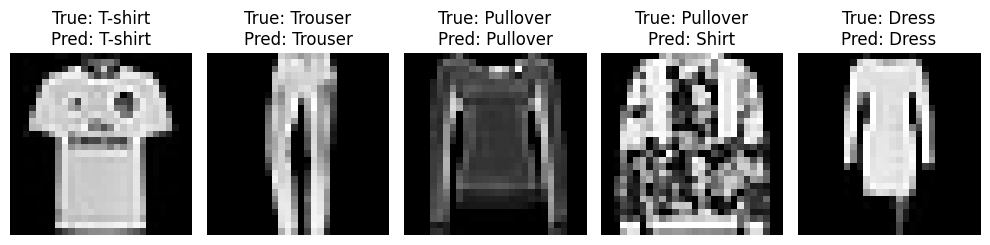

In [15]:
# sample predictions

labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {labels[y_test[i]]}\nPred: {labels[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()